#                              Google PlayStore Dataset Analysis

## In this Notebook, we are going to analyse the dataset (taken from Kaggle) of all the Apps in the Google Play Store

### The series of steps followed are :

> #### 1. Importing Packages
> #### 2. Reading Data
> #### 3. Data Preprocessing
    > #### -  3.1 Handling NULL Values
    > #### -  3.2 Handling Data Types and Values
> #### 4. Analyzing Features
> #### 5. Furthur Analysis.

<a id='1'></a>
## 1. Importing the required packages. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

***

<a id='2'></a>
## 2.  Reading Data

In [4]:
df = pd.read_csv("googleplaystore.csv")

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


***

<a id='3.1'></a>

## 3. Data Preprocessing


### 3.1 Handling NULL Values

In [5]:
print(df.isnull().sum())

df.dropna(inplace=True) #Dropping Rows with Null values


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


> #### Có nhiều giá trị NULL trong Xếp hạng và ít giá trị trong Type, content rating và Ver.

In [6]:
df.drop_duplicates(inplace=True)

> #### Removing Duplicate entries.

In [7]:
df.shape

(8886, 13)

>  ####   Sau khi loại bỏ các hàng có giá trị Null và các mục trùng lặp, cos 8886 ứng dụng để phân tích xếp hạng và hiệu suất của chúng.

***

<a id='3.2'></a>
### 3.2 Handling Data Types of each Feature

#### Các kiểu dữ liệu của mỗi đối tượng địa lý phải được thay đổi sang định dạng thích hợp có thể được sử dụng để phân tích.

In [8]:
df.dtypes  # Displaying Data types of each feature.

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

> #### Tính năng *Review* phải thuộc loại số. Vì vậy, chúng ta nên thay đổi nó.

In [9]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.

>  #### Các đặc trưng khác như *Size*, *Installs*, *Price* và *Android Vers* cũng phải là dạng số.
>  #### Các giá trị mà chúng đang nắm giữ phải được thay đổi sang một định dạng thích hợp để có thể sử dụng chúng để phân tích và lập biểu đồ.
>  #### Example : '10000+' to 10000

### Changing the Feature : Installs

In [10]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

### Changing the feature : Size

In [11]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

### Changing the feature, Price

In [12]:
newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()
    

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

### Changing the feature, Android Ver

In [13]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

***

<a id='4'></a>
## 4. Analyzing Features :

### 4.1 Categories

> ##### Hiển thị tất cả các danh mục và số lượng của chúng.

In [14]:
df.Category.value_counts() 

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

<AxesSubplot:>

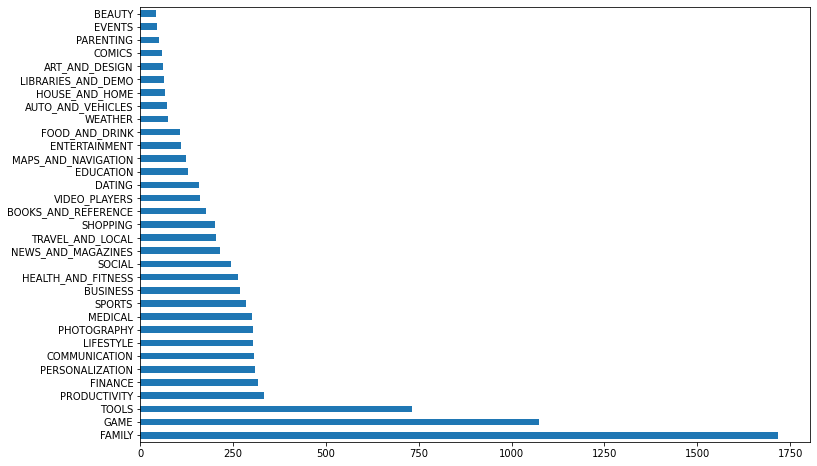

In [15]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8))

> #### **Insight** : Số lượng Apps thuộc Danh mục Game và family .

***

### 4.2  Rating

In [16]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

> #### Distribution Plot of 'Rating'

<AxesSubplot:xlabel='Rating'>

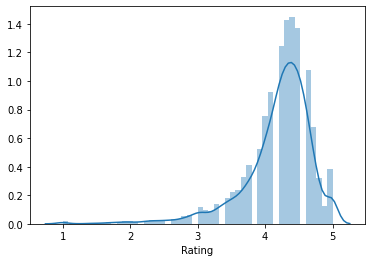

In [17]:
sns.distplot(df.Rating)

> #### Insight : Hầu hết các ứng dụng, rõ ràng đều có xếp hạng trên 4,0! Và đáng ngạc nhiên là có rất nhiều người có xếp hạng 5.0.

***

In [18]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


> #### Có 271 Ứng dụng trong cửa hàng có 5,0 Xếp hạng. Tất cả những điều này có thực sự xứng đáng không? Hay những xếp hạng này bị spam? Hãy phân tích thêm một chuts.

***

### 4.3 Consider the Reviews:

> ##### biểu ddoof phân phối của tính năng 'Đánh giá'

<AxesSubplot:xlabel='Reviews'>

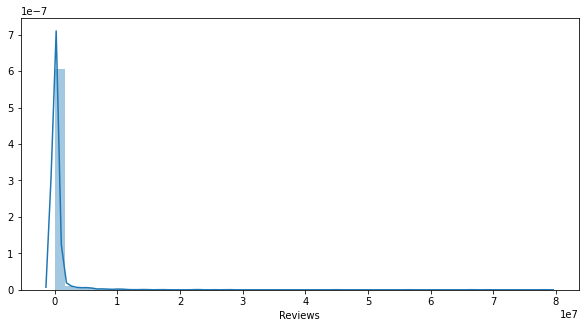

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

> #### Hãy xem xét những ứng dụng có lượng Đánh giá tốt.

In [21]:
df[df.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


> #### Insight : Các Ứng dụng nổi tiếng nhất như WhatsApp, Facebook và Clash of Clans là những Ứng dụng được đánh giá nhiều nhất như hình trên.

***

### 4.4  Type:

([<matplotlib.patches.Wedge at 0x7f1409e297f0>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

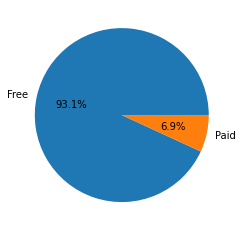

In [22]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

> #### Insight: 93% Ứng dụng là Miễn phí.

***

### 4.5 Price

In [23]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


> #### Insight : Ứng dụng đắt nhất trong Cửa hàng I'm Rich - Trump Edition vs giá 400$

***

### 4.6 Android Version

In [24]:
df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

> #### Count Plot of the various Versions

<AxesSubplot:xlabel='Android Ver', ylabel='count'>

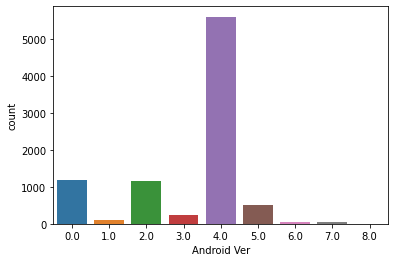

In [26]:
sns.countplot(df['Android Ver'])

> #### Insight : Hầu hết các ứng dụng hỗ trợ Android 4.0 trở lên.


***

<a id='5'></a>
### 5. Furthur Analysis

### Looking at the Apps with 5.0 ratings:

In [27]:
df_full = df[df.Rating == 5]

df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0
615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.0
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0


> #### Distribution plot of 'Installs' of Apps with 5.0 Ratings

<AxesSubplot:xlabel='Installs'>

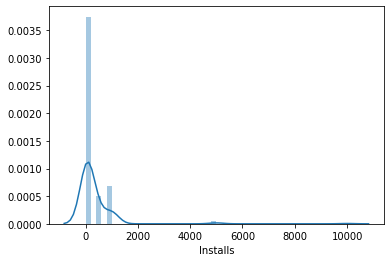

In [28]:
sns.distplot(df_full.Installs)

In [29]:
df_full.Installs.value_counts().sort_index()

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

> #### Insight : Có nhiều Ứng dụng có xếp hạng đầy đủ nhưng số lượt tải xuống / cài đặt ít hơn. Vì vậy,không thể thực sự coi những ứng dụng đó là những ứng dụng tốt nhất.

***

### Xem xét các Ứng dụng có 5,0 Xếp hạng và Số lượt cài đặt Tối đa:

In [30]:
df_full_maxinstalls = df_full[df.Installs > 1000]

df_full_maxinstalls[['App', 'Category', 'Installs']]

,App,Category,Installs
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000.0
8058,Oración CX,LIFESTYLE,5000.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000.0


> ### Kiểm tra số lượng đánh giá của 5.0

<AxesSubplot:xlabel='Reviews'>

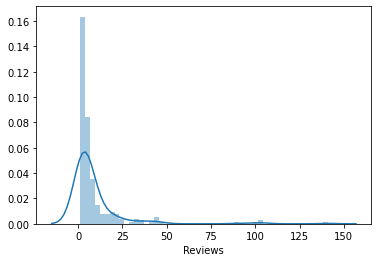

In [31]:
sns.distplot(df_full.Reviews)

> #### Sự phân bố trên là sai lệch rõ ràng. Ứng dụng có rất ít đánh giá dễ dàng được xếp hạng 5,0, điều này có thể gây hiểu lầm.
> #### Vì vậy, chúng ta hãy lọc ra ứng dụng có hơn 30 đánh giá. Những ứng dụng được lọc này là những ứng dụng thực sự đứng cho xếp hạng 5.0.

In [32]:
df_full = df_full[df.Reviews > 30]

In [33]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


<AxesSubplot:xlabel='Genres', ylabel='count'>

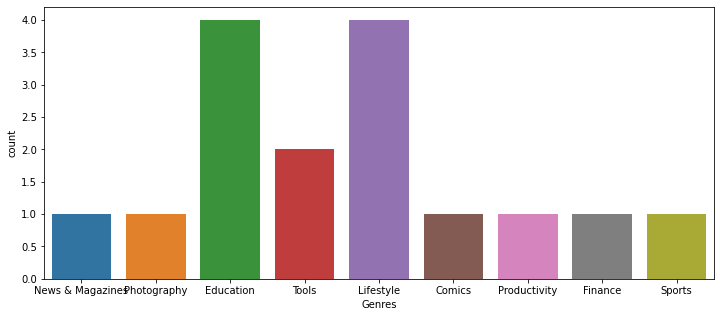

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)


> #### Insight : Các ứng dụng liên quan đến Education, LifeStyle và Tools dường như là có các Xếp hạng với đủ số lượng đánh giá.

***

<AxesSubplot:xlabel='Price', ylabel='count'>

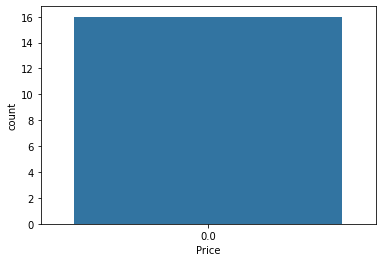

In [35]:
sns.countplot(df_full.Price)

> #### Insight : Tất cả các ứng dụng có xếp hạng 5.0 đều được cài đặt Miễn phí.

***